<b>Part A: Using Single Layer Networks for Classification</b>

<em>Question 1</em>

In [325]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
bias = 1
w = [0,0,0]
w = np.array(w)
inputs = [(0,0,bias),(0,1,bias),(1,0,bias),(1,1,bias)]
inputs = np.array(inputs)
t = [-1,-1,-1,1]
eta = 1

The above code, initialises all values such that: $$ W = \begin{bmatrix}
    0 \\
    0 \\
    0
\end{bmatrix}$$

Where W is the weight matrix which has been augmented such that the weight for the bias has been appended to the end and is intialised to 1. The inputs $X$ have been initialised to: $$\\ X = \begin{bmatrix}
    0 & 0 & b \\
    0 & 1 & b \\
    1 & 0 & b \\
    1 & 1 & b
\end{bmatrix}
\\$$
Where $b$ is the bias that has been appended to each input row vector in $X$. There are two classes of target value: $1$ and $-1$. In the first iteration the target vector has been initialised to: $$\\ T = \begin{bmatrix}
    -1\\
    -1\\
    1\\
    1
\end{bmatrix}$$
Meaning that if input $x^i_1 = 1$ then the target output is a $1$.

The learning rate $\eta$ has been set to $1$. NEED TO JUSTIFY THIS!!! WHY DID I DO THIS???

In [326]:
a = np.dot(inputs,w)
print(a)

[0 0 0 0]


The activation variable that will be passed in to the activation function is assigned to the variable $a$. This operation computes the dot product for each input vector $x \in X$ and will return a vector $A$ in which each element $a_i$ will correspond to dot product $ x_i \cdot W$.

In [327]:
def heaviside(a):
    out = []
    for i in range(len(a)):
        if a[i] >= 0:
            out.append(1)
        else:
            out.append(-1)
    return np.array(out)
heaviside(a)

array([1, 1, 1, 1])

The heaviside activation function $g(a)$.Outputs $1$ if the activation is greater than or equal to 0 and $-1$ otherwise. This takes the activation vector $A$ as an input and returns outputs from the perceptron in vector form such that $y_i = g(a_i)$. The reason that I have chosen to implement the perceptron this way is for conciseness. I could have iterated through each input individually but to do so would be tiresome and an inefficient use of my time to write. This way the entire set of inputs is being proccessed in parallel. 

In [328]:
def cost(y, t,inputs):
    return -np.dot((t-y),inputs)
y = heaviside(a)
c = cost(y,t,inputs)

In [329]:
def plotData():
    sGraph = plt.figure(1)
    plt.scatter(inputs[:,0],inputs[:,1])
    plt.quiver(w[0],w[1], scale = 15,label = 'w')
    plt.xlim(-0.2,1.5)
    plt.ylim(-0.2,1.5)
    plt.grid(b=True, which='major')
    return sGraph

In [330]:
np.dot((t-y),inputs)

array([-2, -2, -6])

The cost function $-(T-Y)\cdot I$ is based upon the perceptron criterion $E^{perc}(W) = -\sum (W \cdot x_I)t_i$ for all misclassified $x_i$. I haved slightly modified this. Rather than only calculating cost for misclassified datapoints, I have passed the entire output vector to the cost function. By subtracting the outputs from the target values, any correctly classifed datapoints will be cancelled out and will not contribute to the overall cost.

TEST TEST TEST TEST
[ 2  2 -4]


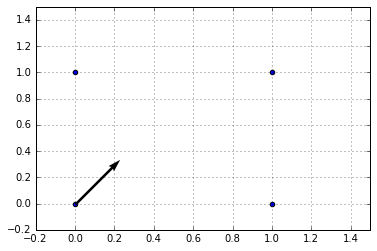

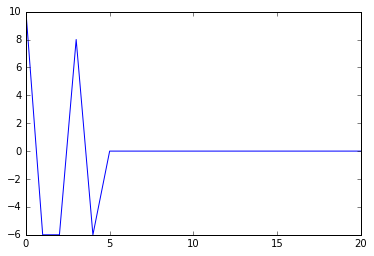

In [331]:
costOverTime =[]
while len(costOverTime) <=20:
    a = np.dot(inputs,w)
    y = heaviside(a)
    w = w-eta*cost(y,t,inputs)
    #print(w)
    costOverTime.append(sum(cost(y,t,inputs)))
g = plotData()
g.show()
costFig = plt.figure(2)
plt.plot(costOverTime)
costFig.show()
print w